# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns

# Predefine options for all plots
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-",})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import our own code
import inauguralproject
import HouseholdSpecializationModel
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

C:\Users\bjark\AppData\Local\Temp\ipykernel_2592\4046134352.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# Question 1
In the following project, we will solve a problem of a household consisting of a male and female member who jointly maximizes their utility by devoting time to either home production or the labor market, where they receive the wage $w_M$ and $w_F$ for males and females respectively. The household gets utility both from consuming consumption goods and household production and they get disutility from working regardless of working in home production or in the labor market. The budget constraint is such that the total consumption of consumption goods equal the total wage income: $C=w_ML_M+w_FL_F$.

Utility is maximized with respect to how much female and male members of the household devote to the labour market and household production: $L_M, H_M, L_F, H_F$. In question 1, we solve the maximization problem discretely, such that they can optimize choosing hours in increments of 0.5 hours. The code beneath, will output a figure showing how the ratio of females to males in the home production changes when we change the parameter for female productivity in home production, $\alpha$, and the elasticity of substitution between men and females in home production, $\sigma$. We call the model from HouseholdSpecializationModelOriginalfinal line XX-XX



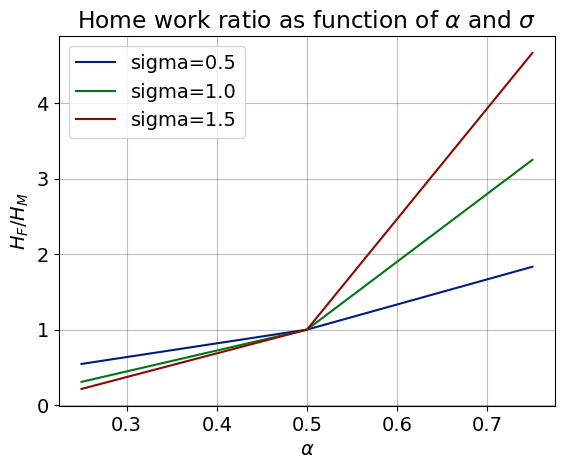

In [74]:
#We construct two vectors of the relevant alphas and sigmas as well as an empty dictionary to store our results
list_alphas = [ 0.25, 0.5, 0.75]
list_sigmas = [ 0.5, 1.0, 1.5]
results_ratio = {}

#We solve the model for each alpha and sigma in the above vectors
for sigma in list_sigmas:
    model.par.sigma = sigma
    for alpha in list_alphas:
        model.par.alpha = alpha 
        opt = model.solve_discrete() #Calling the model from the class
        results_ratio[(alpha, sigma)] = opt.HF/opt.HM #Storing the optimal HF and HM

# Plotting optimal HF and HM
fig = plt.figure()
ax= fig.add_subplot()
for sigma in list_sigmas:
    y = [results_ratio[(alpha, sigma)] for alpha in list_alphas]
    ax.plot(list_alphas, y, label=f"sigma={sigma}")
ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$H_F/H_M$")
ax.set_title('Home work ratio as function of $\\alpha$ and $\sigma$')

ax.legend()
plt.show()

In the graph above, we see that:

If women are more productive than men ($\alpha$>0.5), it is optimal for women to work more in home production compared to men and vice versa. 

Since we have set the wage rate of men and females in the labour market equal, $w_M=w_F=1$, men and females will work same number of hours in the home production when there productivity equals, $\alpha=0.5$. 

Changes in the realtive productivity between men and women will have a larger effect on the relative participation in home production when men and women are more substitutable in home production i.e. higher $\sigma$.

# Question 2
In the following question, we will plot and see how the male to female ratio in home production changes, when changing the labour wage ratio, $\frac{w_F}{w_M}$.

For Wf = 0.80: LM = 6.00, HM = 4.00, LF = 3.00, HF = 5.00 
For Wf = 0.90: LM = 5.00, HM = 4.50, LF = 4.00, HF = 4.50 
For Wf = 1.00: LM = 4.50, HM = 4.50, LF = 4.50, HF = 4.50 
For Wf = 1.10: LM = 4.00, HM = 4.50, LF = 5.00, HF = 4.00 
For Wf = 1.20: LM = 3.00, HM = 5.00, LF = 5.50, HF = 4.00 


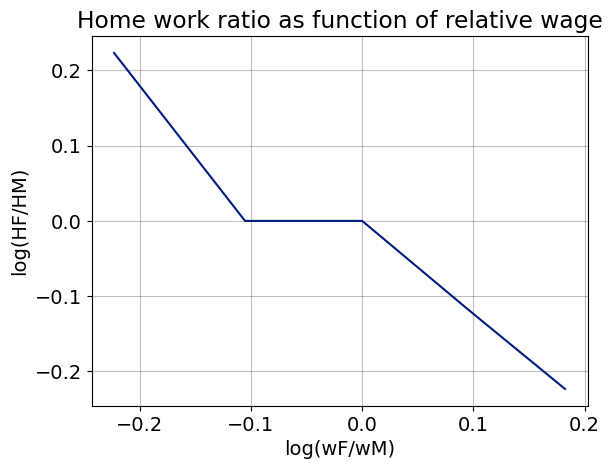

In [ ]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM

#We construct two empty vectors to store our results for the work ratio and wage ratio
results_workratio = np.empty(5)
results_wageratio = np.empty(5)

#We solve the model for the discrete series of wage ratios
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete()
    results_workratio[i] = np.log(opt.HF/opt.HM) #Storing the work ratio
    results_wageratio[i] = np.log(model.par.wF/model.par.wM) #Storing the wage ratio
    print(f'For Wf = {model.par.wF:.2f}: LM = {opt.LM:.2f}, HM = {opt.HM:.2f}, LF = {opt.LF:.2f}, HF = {opt.HF:.2f} ') #Printing optimal values

#We plot the work ratio against the wage ratio
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_wageratio, results_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

As expected, the above figure and table show that optimal relative partipation of women in home production decreases with a higher relative labor wage for women. A higher labour wage for women makes their participation in the home production more costly in terms of forgone consumption of consumer goods, why their time devoted to the labor market rises compared to that of men. We have log transformed both the independent and the dependent variable, hence the slope of the graph represents the elasticity of the ratio of female and male in home production to the wage ratio. 

The horizontal part of the graph where changes to the wage ratio does not affect the input in home production is due to the nature of the choice variables being discrete.

# Question 3

In this problem, we want the same output as in question 2, however the choice variables of time devotion will now be continuous. We start out by creating the continious solver (see HouseholdSpecializationModel.py line (((115 - 127 CHECK THAT IT DOES NOT CHANGE)). In the code below, we just call the solver just as in question 2. 

 For Wf = 0.80: LM = 5.89, HM = 4.09, LF = 2.87, HF = 5.12, utility = -0.24511 
 For Wf = 0.90: LM = 5.17, HM = 4.27, LF = 3.75, HF = 4.75, utility = -0.24188 
 For Wf = 1.00: LM = 4.45, HM = 4.45, LF = 4.45, HF = 4.45, utility = -0.23811 
 For Wf = 1.10: LM = 3.76, HM = 4.64, LF = 5.02, HF = 4.22, utility = -0.23400 
 For Wf = 1.20: LM = 3.09, HM = 4.83, LF = 5.48, HF = 4.03, utility = -0.22971 


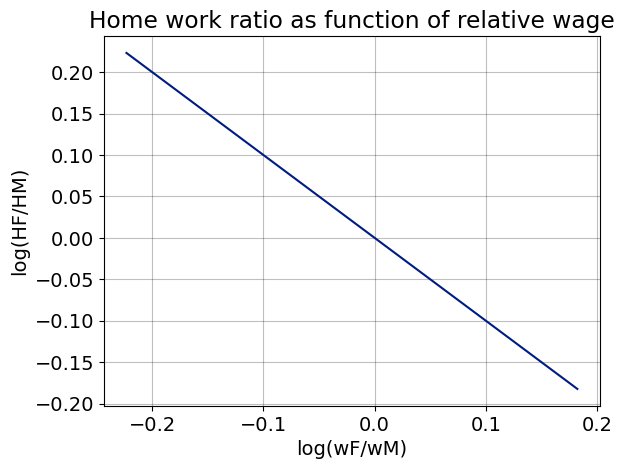

In [12]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM = 1

#We construct two empty vectors to store our results for the work ratio and wage ratio
results_con_workratio = np.empty(5)
results_con_wageratio = np.empty(5)

#We solve the model for the discrete series of wage ratios
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    results_con_workratio[i] = np.log(opt.HF/opt.HM) #Storing the work ratio
    results_con_wageratio[i] = np.log(model.par.wF/model.par.wM) #Storing the wage ratio
    print(f' For Wf = {model.par.wF:.2f}: LM = {opt.LM:.2f}, HM = {opt.HM:.2f}, LF = {opt.LF:.2f}, HF = {opt.HF:.2f}, utility = {opt.util:.5f} ') #Printing optimal values

#We plot the work ratio against the wage ratio
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_con_wageratio, results_con_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');




Since the choice variable now is continuous, the relationship between the relative wage ratio and the participation ratio in home production can be explained by a constant linear slope which again should be interpreted as the elasticity of inputs in home production to the relative wage rate. The above figure and table show that the optimal relative partipation of women in home production decreases with a higher relative labor wage for women.

# Question 4

In the following exercise, we will run a regression of the type $log\frac{H_F}{H_M}=\beta_0+\beta_1log\frac{w_F}{w_M}$, and estimate $\beta_0$ and $\beta_1$. Then we will change $\alpha$ and $\sigma$ in order to minimize the squared deviation to the results found by Siminski and Yetsenga (2022).

In the HouseholdSpecializationModel.py line 1290-140, we start by creating a solver for the vector of female wages which we log transform and use as our independent variable, here using that $w_M=1$. We also make a loop that uses the continuous optimizer from question three to return the relative input of men and women in home produciton for each wage ratio.

 beta0 = 0.4000, beta1 = -0.1000, deviation = 0.0000, alpha = 0.9820, sigma = 0.1000


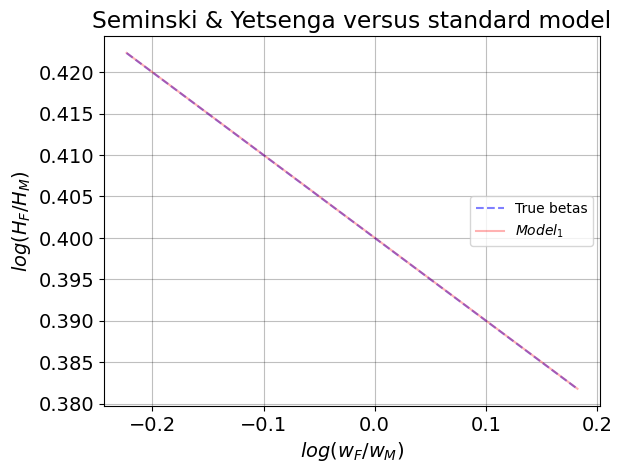

In [2]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM = 1

#First we run the solver for the vector of female wages to find optimal choices
model.solve_wF_vec()
#We use the above optimal choices to estimate the betas using OLS
model.estimate()
beta0_hat = model.sol.beta0
beta1_hat = model.sol.beta1
print(f' beta0 = {model.sol.beta0:.4f}, beta1 = {model.sol.beta1:.4f}, deviation = {((0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2):.4f}, alpha = {model.par.alpha:.4f}, sigma = {model.par.sigma:.4f}')

#We create two empty vectors to store results of the model prediction using the 'true' estimators and the estimators from the model
pointestimates_data = np.empty(5)
pointestimates_model = np.empty(5)


#For each female wage in the vector, we compute model predictions  of home work ratio for the 'true' estimators and the estimators from the model
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    pointestimates_model[i] = beta0_hat + beta1_hat*np.log(wF/model.par.wM)
    pointestimates_data[i] = 0.4 - 0.1*np.log(wF/model.par.wM)

#We plot the estimates of work ratio as function of wage ratio based on 'true' estimators and estimators from the model
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec), pointestimates_data, label = 'True betas', color = 'b', linestyle='--', alpha= 0.5)
ax.plot(np.log(model.par.wF_vec), pointestimates_model, label = '$Model_1$', color = 'r', alpha=0.3)
ax.set_title('Seminski & Yetsenga versus standard model')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$')
ax.legend(loc=5, prop={'size': 10}) ;
    

%%Hvad er der sket med modellen her? - Den er spot on. 
Our results above show that when $\alpha=0.982$ and $\sigma=0.1$ w have zero deviation to the result by Siminski and Yetsenga. In order for this to be true, women needs to be a lot more productive than men in home production and their input needs to be complementaries.

# Question 5

 beta0 = 2.55170583158166e-06, beta1 = -0.09882204528526485, deviation = 0.15999934621915593, alpha = 0.5, sigma = 0.098828125
 beta0 = 0.4237312408152881, beta1 = -0.13590654565692964, deviation = 0.0018524518116463684, alpha = 0.5, sigma = 0.7261718750000024


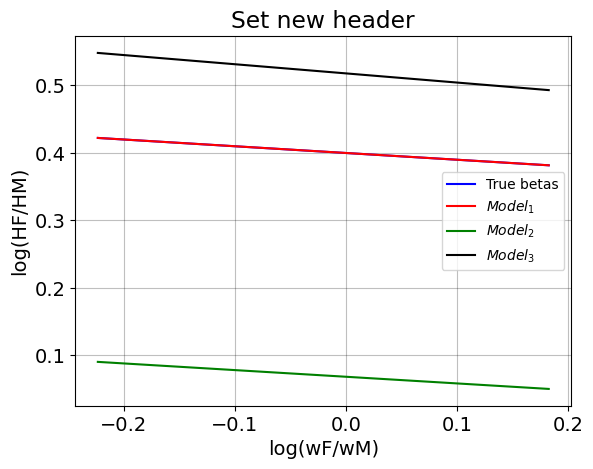

In [11]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.wM = 1 

#We make a new estimator (see py file line 169 onwards) that minimizes squarred deviations from true betas holding alpha fixed and varying sigma
model.estimatev2()
#We store the betas from the above estimation
beta0_hat2 = model.sol.beta0
beta1_hat2 = model.sol.beta1
print(f' beta0 = {model.sol.beta0}, beta1 = {model.sol.beta1}, deviation = {(0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2}, alpha = {model.par.alpha}, sigma = {model.par.sigma}')

#We extend the model by setting male wages equal to two. Then we minimize squarred deviation from true betas again as above.
model.par.sigma = 1
model.par.wM = 2.0
model.estimatev2()
#We store the betas from the above estimation
beta0_hat3 = model.sol.beta0
beta1_hat3 = model.sol.beta1
print(f' beta0 = {model.sol.beta0}, beta1 = {model.sol.beta1}, deviation = {(0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2}, alpha = {model.par.alpha}, sigma = {model.par.sigma}')

#We create two empty vectors to store results of the model prediction of home work ratio with fixed alpha for male wage equal to 1 and 2 respectively.
pointestimates_model2 = np.empty(5)
pointestimates_model3 = np.empty(5)

#For each female wage in the vector, we compute model predictions of home work ratio for the two above models
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    pointestimates_model2[i] = beta0_hat2 + beta1_hat2*np.log(wF/model.par.wM)
    pointestimates_model3[i] = beta0_hat3 + beta1_hat3*np.log(wF/model.par.wM)


#We plot the work ratio against the wage ratio for the data and our three models
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec), pointestimates_data, label = 'True betas', color = 'b')
ax.plot(np.log(model.par.wF_vec), pointestimates_model, label = '$Model_1$', color = 'r')
ax.plot(np.log(model.par.wF_vec), pointestimates_model2, label = '$Model_2$', color= 'g' )
ax.plot(np.log(model.par.wF_vec), pointestimates_model3, label = '$Model_3$', color = 'k')
ax.set_title('Set new header')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')
ax.legend(loc=5, prop={'size': 10}) ;


# TEST

In [9]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM = 1


model.estimatev2()
print(f' beta0 = {model.sol.beta0}, beta1 = {model.sol.beta1}, deviation = {(0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2}, alpha = {model.par.alpha}, sigma = {model.par.sigma}')

 beta0 = 2.55170583158166e-06, beta1 = -0.09882204528526485, deviation = 0.15999934621915593, alpha = 0.5, sigma = 0.098828125


In [10]:
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM = 1
model.estimatev3()

print(f'beta0 = {model.sol.beta0}, beta1 = {model.sol.beta1},deviation = {(0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2}, Wm = {model.par.wM}, sigma = {model.par.sigma} ')

beta0 = 0.3999791316529578, beta1 = -0.09982582120759369,deviation = 3.077373963239846e-08, Wm = 2.0615108120764543, sigma = 0.6622231547778918 
